In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv

In [2]:
# Load data from netlogo's behaviorspace "spreadsheet" output
def loadBehaviorspace(filename):
    lines = []
    with open(filename, 'rb') as csvfile:
         reader = csv.reader(csvfile, delimiter=',', quotechar='"')
         for row in reader:
             lines.append(row)

    metadata = lines[0:5]
    
    _data = lines[6:]
    _data = np.array(lines[6:], dtype=object).T
    for i in range(1, len(_data)):
        for j in range(1, len(_data[i])):
            try:
                _data[i][j] = float(_data[i][j])
            except:
                continue
    data = {}
    for col in _data:
        data[col[0]] = np.array(col[1:], dtype=float)
            
    return (metadata, data)

In [89]:
#metadata,data = loadBehaviorspace("./behaviorspace_data/vary_tau_p_adaptive-1_favorstable.csv")
metadata,data = loadBehaviorspace("./behaviorspace_data/vary_tau_percenttoreplace_adaptive-2_5_p_0.2.csv")


## Final total wealth, p vs tau

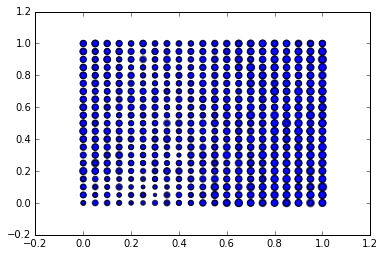

In [108]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
#final_p = np.extract(final_step_mask, data['p'])
#final_num_variants = np.extract(final_step_mask, data['num-variants'])
final_percent_to_replace = np.extract(final_step_mask, data['percent-to-replace'])

final_total_wealth = np.extract(final_step_mask, data['total-wealth'])

# scale wealth down
scaled_wealth = (final_total_wealth - 3000) / 50

plt.scatter(final_tau, final_percent_to_replace, s=scaled_wealth, alpha=0.5)
plt.show()

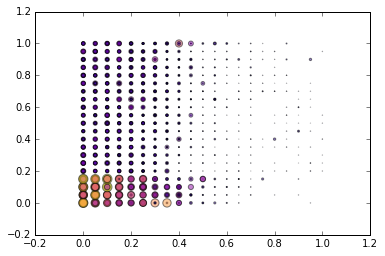

In [94]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
#final_p = np.extract(final_step_mask, data['p'])
#final_num_variants = np.extract(final_step_mask, data['num-variants'])
final_percent_to_replace = np.extract(final_step_mask, data['percent-to-replace'])

final_total_wealth = np.extract(final_step_mask, data['total-wealth'])

# scale wealth down
scaled_wealth = (final_total_wealth - 3000) / 50

final_variance = np.extract(final_step_mask, data['agent-variance'])

plt.scatter(final_tau, final_percent_to_replace, s=scaled_variance, c=plt.cm.plasma(plt.Normalize()(final_variance)), alpha=0.5)
plt.show()

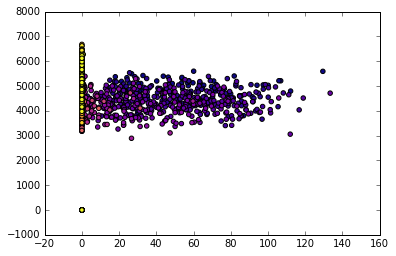

In [66]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
#final_p = np.extract(final_step_mask, data['p'])
final_num_variants = np.extract(final_step_mask, data['num-variants'])

final_total_wealth = np.extract(final_step_mask, data['total-wealth'])

final_variance = np.extract(final_step_mask, data['agent-variance'])

plt.scatter(final_variance, final_total_wealth, c=plt.cm.plasma(plt.Normalize()(final_tau)))
plt.show()

...

## Final total wealth vs tau
For a particular value


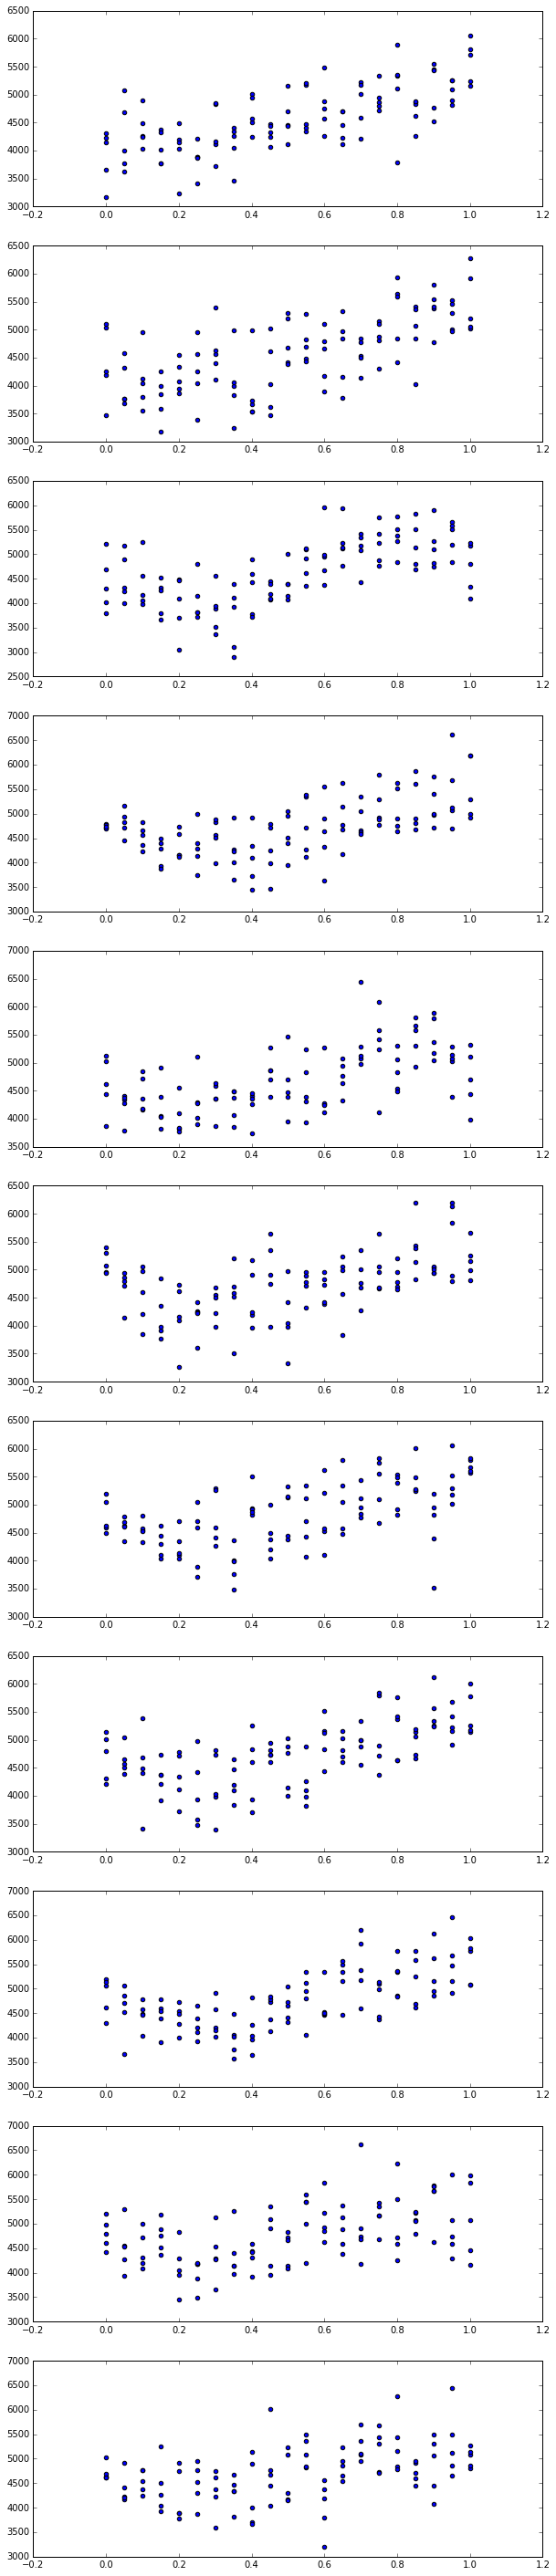

In [84]:
final_step_mask = [step == 100 for step in data['[step]']]
final_tau = np.extract(final_step_mask, data['tau'])
final_total_wealth = np.extract(final_step_mask, data['total-wealth'])

variant_values = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

plt.figure(figsize=(10,50))
for index in range(len(variant_values)):
    i = variant_values[index]
    value_mask = [nv == i for nv in np.extract(final_step_mask, data['num-variants'])]

    final_tau_at_value = np.extract(value_mask, final_tau)
    final_total_wealth_at_value = np.extract(value_mask, final_total_wealth)

    plt.subplot(len(variant_values), 1, index+1)
    plt.scatter(final_tau_at_value, final_total_wealth_at_value)
plt.show()

In [39]:
h = [[17, 14, 19], [17, 19, 14], [17, 15, 18], [20, 14, 16], [9, 20, 21], [14, 16, 20], [10, 20, 20], [13, 19, 18], [12, 23, 15], [16, 10, 24], [21, 17, 12], [14, 13, 23], [16, 21, 13], [16, 14, 20], [18, 18, 14], [7, 21, 22], [11, 17, 22], [18, 15, 17], [19, 15, 16], [11, 19, 20], [15, 16, 19], [16, 14, 20], [10, 23, 17], [14, 11, 25], [14, 25, 11], [3, 25, 22], [5, 24, 21], [6, 23, 21], [8, 21, 21], [10, 16, 24], [11, 20, 19], [13, 15, 22], [14, 14, 22], [16, 22, 12], [20, 5, 25], [17, 24, 9], [1, 23, 26], [2, 22, 26], [6, 21, 23], [11, 19, 20], [13, 13, 24], [14, 24, 12], [21, 9, 20], [20, 20, 10], [5, 22, 23], [6, 22, 22], [6, 22, 22], [9, 20, 21], [5, 24, 21], [6, 23, 21], [11, 20, 19], [12, 16, 22], [10, 18, 22], [7, 23, 20], [13, 19, 18], [15, 25, 10], [16, 5, 29], [14, 22, 14], [16, 14, 20], [14, 18, 18], [13, 17, 20], [15, 16, 19], [11, 20, 19], [16, 16, 18], [16, 15, 19], [17, 25, 8], [19, 8, 23], [17, 23, 10], [6, 20, 24], [7, 20, 23], [7, 19, 24], [12, 18, 20], [12, 19, 19], [16, 18, 16], [16, 13, 21], [20, 21, 9], [18, 9, 23], [4, 23, 23], [7, 21, 22], [10, 23, 17], [11, 19, 20], [17, 18, 15], [20, 13, 17], [21, 22, 7], [2, 22, 26], [2, 22, 26], [2, 23, 25], [3, 22, 25], [3, 22, 25], [3, 23, 24], [5, 19, 26], [6, 19, 25], [3, 23, 24], [5, 20, 25], [9, 19, 22], [11, 18, 21], [12, 17, 21], [18, 19, 13], [26, 11, 13], [31, 8, 11]]